# Convolutions

In this lab, we'll look in detail at convolutions and how they can be used to process images.

### Reading and opening images

We'll use the `skimage` library to read and process images. It's a library dedicated to image processing, which is part of the `scikit-learn` family.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import skimage

sample image shape:  (400, 600, 3)


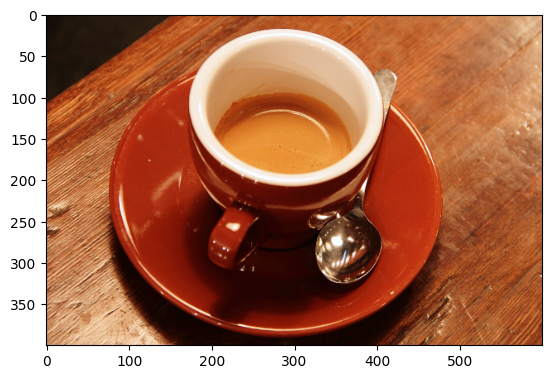

In [ ]:
sample_image = skimage.data.coffee()

size = sample_image.shape
print("sample image shape: ", sample_image.shape)

plt.imshow(sample_image.astype('uint8'));

### A simple convolution filter

Before we start working on training any models, let's look at applying a convolution filter to an image. We'll use the `Conv2D` layer from Keras to do this.

In [ ]:
from tensorflow.keras.layers import Conv2D

In [ ]:
conv = Conv2D(filters=3, kernel_size=(5, 5), padding="same")

Remember: in Keras, `None` is used as a marker for tensor dimensions with dynamic size. In this case `batch_size`, `width` and `height` are all dynamic: they can depend on the input. This is a neat feature of convolutional neural networks: the same model can be used to process images of any size, because all we have to do is slide the convolutional filter across the image as much as necessary.

In [ ]:
sample_image.shape

(400, 600, 3)

In [ ]:
img_in = np.expand_dims(sample_image, 0).astype(float)
img_in.shape

(1, 400, 600, 3)

In [ ]:
img_out = conv(img_in) # Apply the convolutional filter

The output is a tensorflow Eager Tensor - a special data structure that is used to represent the result of operations in TensorFlow. It is not a numpy array, but it can be converted to one using the `.numpy()` method:

In [ ]:
np_img_out = img_out[0].numpy()
print(type(np_img_out))
print(np_img_out.shape)

<class 'numpy.ndarray'>
(400, 600, 3)


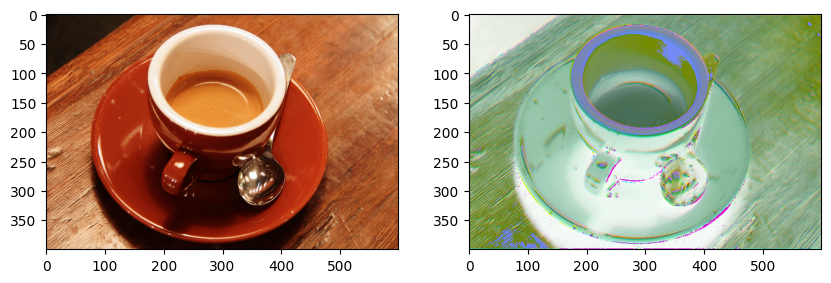

In [ ]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(sample_image.astype('uint8'))
ax1.imshow(np_img_out.astype('uint8'));

As we can see, our convolutional filter was initialized randomly, so our output doesn't contain any specific meaning. Each pixel is a random combination of the pixels in the input image, in a 5x5 window.

Let's instead take a look at a convolutional feature with a clear purpose. We can build a kernel ourselves, by defining a function which will be passed to `Conv2D` Layer.
We'll create an array with 1/25 for filters, with each channel seperated. Before you move to the next cell, can you guess what this filter will do?

In [ ]:
def my_kernel(shape=(5, 5, 3, 3), dtype=None):
    array = np.zeros(shape=shape, dtype="float32")
    array[:, :, 0, 0] = 1 / 25
    array[:, :, 1, 1] = 1 / 25
    array[:, :, 2, 2] = 1 / 25
    return array

Now we can use this function to initialize a `Conv2D` layer:

In [ ]:
conv = Conv2D(filters=3, kernel_size=(5, 5), padding="same", kernel_initializer=my_kernel)

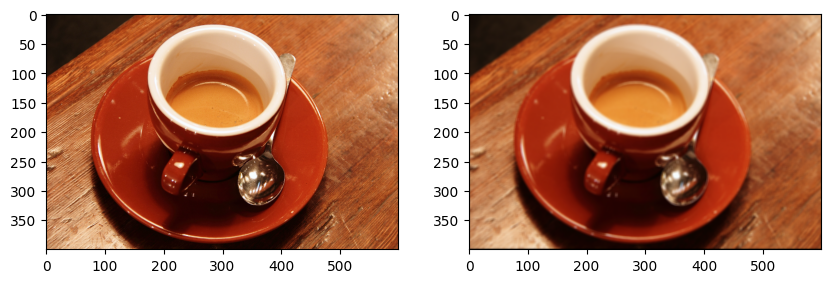

In [ ]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(img_in[0].astype('uint8'))

img_out = conv(img_in)
np_img_out = img_out[0].numpy()
ax1.imshow(np_img_out.astype('uint8'));

Hopefully you can tell what this filter does!

**Exercise**
- There are a number of settings when we define our Conv2D layer. Try changing the following parameters to get a sense of how they impact the result:
- kernel_size: try different sizes
- padding: try 'valid' instead of 'same' (hint: this may change the size of the output)

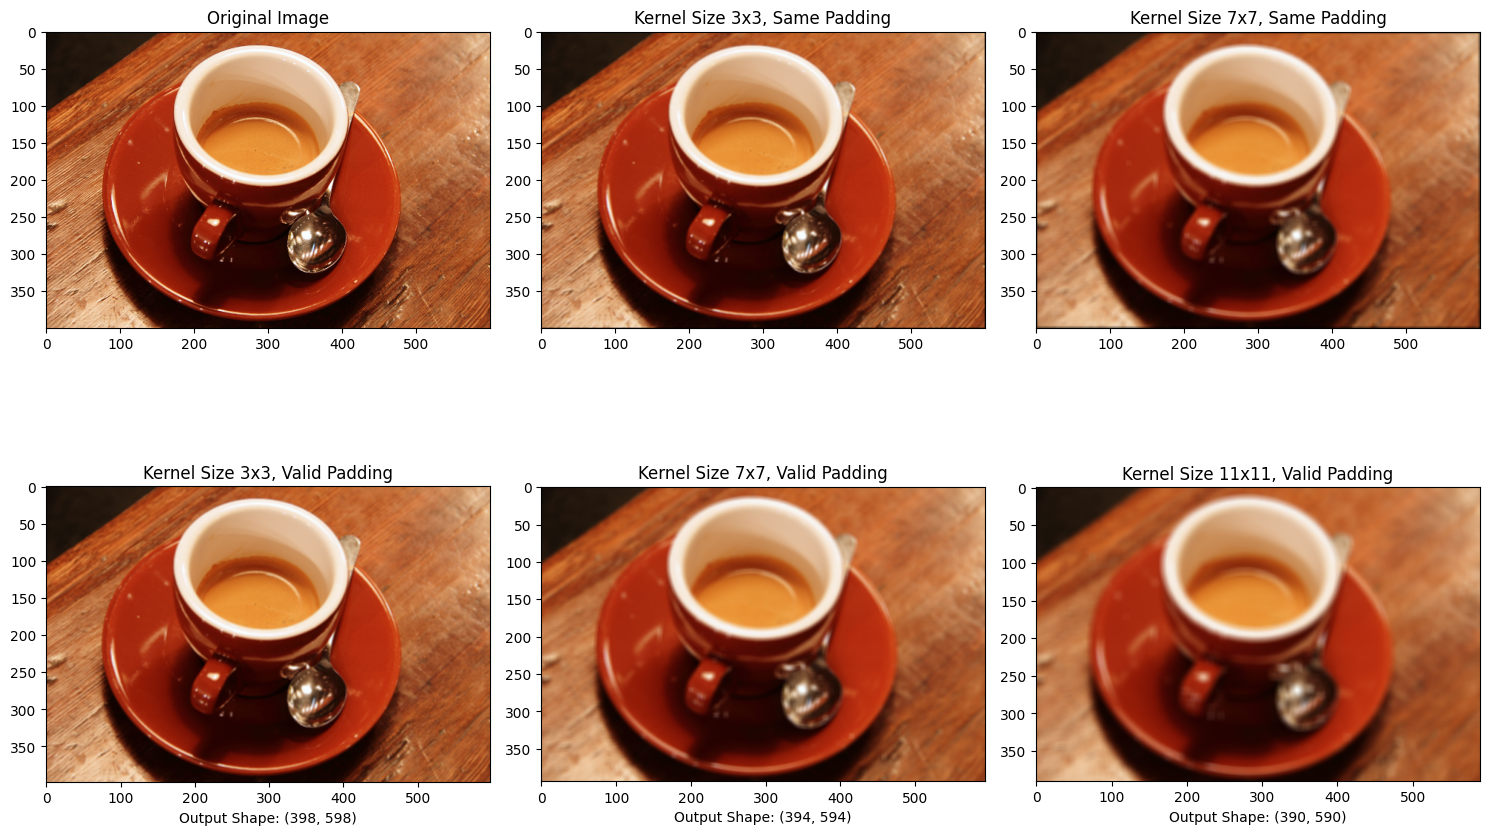

In [ ]:
# Experimenting with different kernel sizes and padding
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original image
axes[0, 0].imshow(sample_image.astype('uint8'))
axes[0, 0].set_title('Original Image')

# Different kernel sizes
kernel_sizes = [3, 7, 11]

# First kernel with same padding
size = kernel_sizes[0]
def kernel_func(shape=(size, size, 3, 3), dtype=None):
    array = np.zeros(shape=shape, dtype="float32")
    array[:, :, 0, 0] = 1 / (size * size)
    array[:, :, 1, 1] = 1 / (size * size)
    array[:, :, 2, 2] = 1 / (size * size)
    return array
conv = Conv2D(filters=3, kernel_size=(size, size), padding="same", kernel_initializer=kernel_func)
img_out = conv(img_in)[0].numpy()
axes[0, 1].imshow(img_out.astype('uint8'))
axes[0, 1].set_title(f'Kernel Size {size}x{size}, Same Padding')

# Second kernel with same padding
size = kernel_sizes[1]
def kernel_func(shape=(size, size, 3, 3), dtype=None):
    array = np.zeros(shape=shape, dtype="float32")
    array[:, :, 0, 0] = 1 / (size * size)
    array[:, :, 1, 1] = 1 / (size * size)
    array[:, :, 2, 2] = 1 / (size * size)
    return array
conv = Conv2D(filters=3, kernel_size=(size, size), padding="same", kernel_initializer=kernel_func)
img_out = conv(img_in)[0].numpy()
axes[0, 2].imshow(img_out.astype('uint8'))
axes[0, 2].set_title(f'Kernel Size {size}x{size}, Same Padding')

# First kernel with valid padding
size = kernel_sizes[0]
def kernel_func(shape=(size, size, 3, 3), dtype=None):
    array = np.zeros(shape=shape, dtype="float32")
    array[:, :, 0, 0] = 1 / (size * size)
    array[:, :, 1, 1] = 1 / (size * size)
    array[:, :, 2, 2] = 1 / (size * size)
    return array
conv = Conv2D(filters=3, kernel_size=(size, size), padding="valid", kernel_initializer=kernel_func)
img_out = conv(img_in)[0].numpy()
axes[1, 0].imshow(img_out.astype('uint8'))
axes[1, 0].set_title(f'Kernel Size {size}x{size}, Valid Padding')
axes[1, 0].set_xlabel(f'Output Shape: {img_out.shape[:2]}')

# Second kernel with valid padding
size = kernel_sizes[1]
def kernel_func(shape=(size, size, 3, 3), dtype=None):
    array = np.zeros(shape=shape, dtype="float32")
    array[:, :, 0, 0] = 1 / (size * size)
    array[:, :, 1, 1] = 1 / (size * size)
    array[:, :, 2, 2] = 1 / (size * size)
    return array
conv = Conv2D(filters=3, kernel_size=(size, size), padding="valid", kernel_initializer=kernel_func)
img_out = conv(img_in)[0].numpy()
axes[1, 1].imshow(img_out.astype('uint8'))
axes[1, 1].set_title(f'Kernel Size {size}x{size}, Valid Padding')
axes[1, 1].set_xlabel(f'Output Shape: {img_out.shape[:2]}')

# Third kernel with valid padding
size = kernel_sizes[2]
def kernel_func(shape=(size, size, 3, 3), dtype=None):
    array = np.zeros(shape=shape, dtype="float32")
    array[:, :, 0, 0] = 1 / (size * size)
    array[:, :, 1, 1] = 1 / (size * size)
    array[:, :, 2, 2] = 1 / (size * size)
    return array
conv = Conv2D(filters=3, kernel_size=(size, size), padding="valid", kernel_initializer=kernel_func)
img_out = conv(img_in)[0].numpy()
axes[1, 2].imshow(img_out.astype('uint8'))
axes[1, 2].set_title(f'Kernel Size {size}x{size}, Valid Padding')
axes[1, 2].set_xlabel(f'Output Shape: {img_out.shape[:2]}')

plt.tight_layout()
plt.show()

### Working on edge detection on Grayscale image

Using a grayscale image, let's build an "edge detector" using a convolutional filter. Some filters pre-date the deep learning era and are still used today. For example, the Sobel filter is used to detect edges in images. These easy-to-compute filters were used in the early days of computer vision and are still useful now.

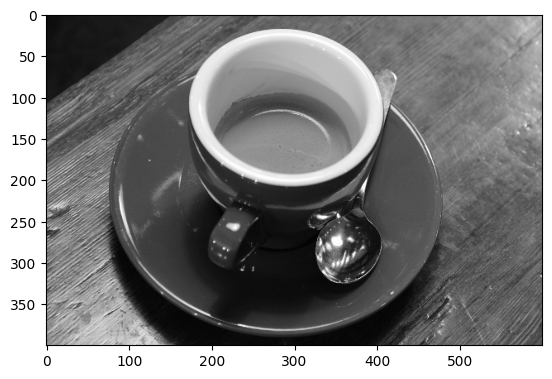

In [ ]:
# convert image to greyscale
grey_sample_image = sample_image.mean(axis=2)

# add the channel dimension even if it's only one channel so
# to be consistent with Keras expectations.
grey_sample_image = grey_sample_image[:, :, np.newaxis]

# matplotlib does not like the extra dim for the color channel
# when plotting gray-level images. Let's use squeeze:
plt.imshow(np.squeeze(grey_sample_image.astype(np.uint8)),
           cmap=plt.cm.gray);

**Exercise**
- Build an edge detector using `Conv2D` on greyscale image by defining the kernel inside `my_kernel`.
- You may experiment with several kernels to find a way to detect edges. The following article contains specific examples of kernels that you can use:
- https://en.wikipedia.org/wiki/Kernel_(image_processing)
- Try different kernels and see the impact on the output.

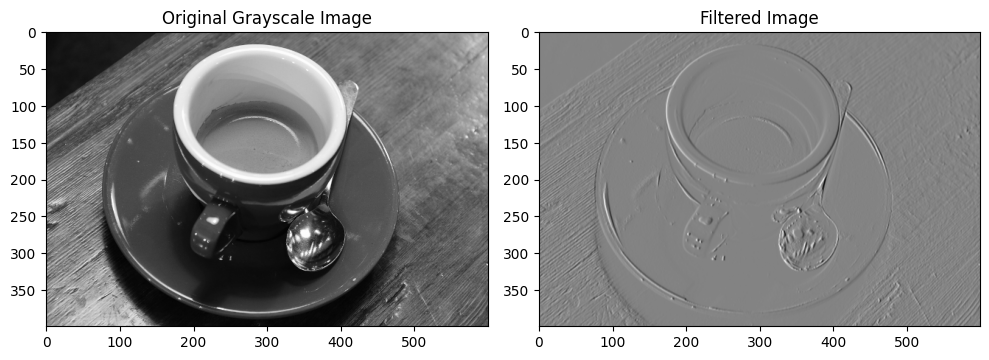

In [ ]:
def my_kernel(shape=(3, 3, 1, 1), dtype=None):
    # Choose one of the kernels below by uncommenting it

    # 1. Laplacian Edge Detection (highlights edges in all directions)
    # array = np.array([
    #     [0, -1, 0],
    #     [-1, 4, -1],
    #     [0, -1, 0]
    # ], dtype='float32')

    # 2. Stronger Laplacian Edge Detection
    # array = np.array([
    #     [-1, -1, -1],
    #     [-1, 8, -1],
    #     [-1, -1, -1]
    # ], dtype='float32')

    # 3. Sobel Edge Detection (vertical edges)
    array = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ], dtype='float32')

    # 4. Sobel Edge Detection (horizontal edges)
    # array = np.array([
    #     [-1, -2, -1],
    #     [0, 0, 0],
    #     [1, 2, 1]
    # ], dtype='float32')

    # 5. Sharpen
    # array = np.array([
    #     [0, -1, 0],
    #     [-1, 5, -1],
    #     [0, -1, 0]
    # ], dtype='float32')

    # 6. Box Blur
    # array = np.ones((3, 3), dtype='float32') / 9

    # 7. Gaussian Blur
    # array = np.array([
    #     [1, 2, 1],
    #     [2, 4, 2],
    #     [1, 2, 1]
    # ], dtype='float32') / 16

    # Reshape to match the expected shape for Conv2D
    array = array.reshape(*shape)
    return array

# Apply the convolution
conv = Conv2D(filters=1, kernel_size=(3, 3), padding="same", kernel_initializer=my_kernel)
img_in = np.expand_dims(grey_sample_image, 0)  # Reshape into a batch of size 1
img_out = conv(img_in)  # Apply the convolutional filter
np_img_out = img_out[0].numpy()  # Convert to numpy array

# Display the results
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(np.squeeze(grey_sample_image.astype(np.uint8)), cmap=plt.cm.gray)
ax0.set_title("Original Grayscale Image")
ax1.imshow(np.squeeze(np_img_out), cmap=plt.cm.gray)
ax1.set_title("Filtered Image")
plt.tight_layout()

### Pooling and strides with convolutions

**Exercise**
- Use `MaxPool2D` to apply a 2x2 max pool with strides 2 to the image. What is the impact on the shape of the image?
- Use `AvgPool2D` to apply an average pooling.
- Is it possible to compute a max pooling and an average pooling with well chosen kernels?

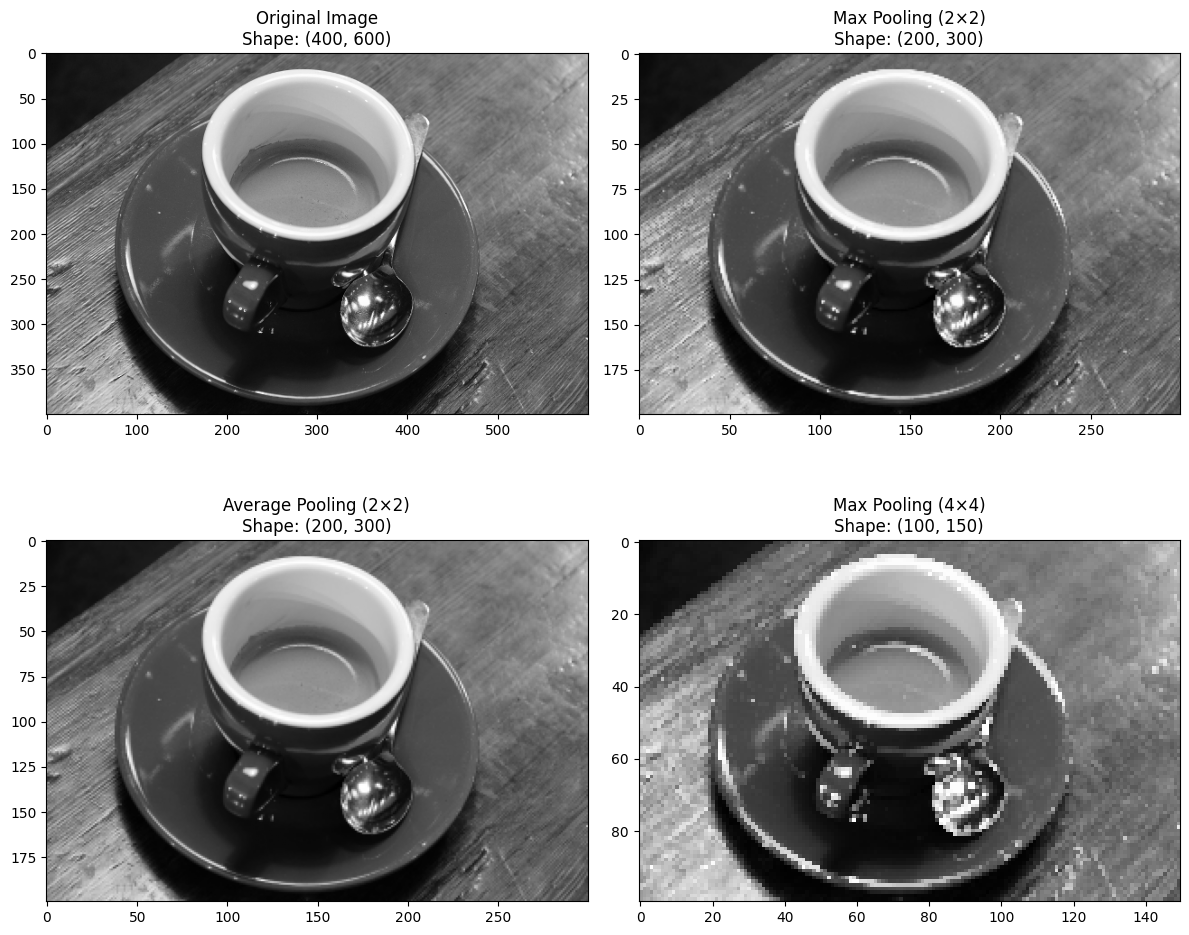

Original shape: (400, 600, 1)
After 2×2 pooling: (200, 300, 1)
After 4×4 pooling: (100, 150, 1)

Observations:
1. Each 2×2 pooling reduces dimensions by half
2. Max pooling preserves bright features (edges)
3. Average pooling smooths the image
4. Larger pooling windows reduce resolution more dramatically


In [ ]:
from tensorflow.keras.layers import MaxPool2D, AvgPool2D
import matplotlib.pyplot as plt
import numpy as np

# Prepare the grayscale image with batch dimension
img_in = np.expand_dims(grey_sample_image, 0)  # Shape: (1, height, width, 1)

# Create a figure to display results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Original image
axes[0, 0].imshow(np.squeeze(grey_sample_image.astype(np.uint8)), cmap=plt.cm.gray)
axes[0, 0].set_title(f"Original Image\nShape: {grey_sample_image.shape[:2]}")

# Apply Max Pooling (2×2)
max_pool = MaxPool2D(pool_size=(2, 2), strides=(2, 2))
max_out = max_pool(img_in)[0].numpy()
axes[0, 1].imshow(np.squeeze(max_out.astype(np.uint8)), cmap=plt.cm.gray)
axes[0, 1].set_title(f"Max Pooling (2×2)\nShape: {max_out.shape[:2]}")

# Apply Average Pooling (2×2)
avg_pool = AvgPool2D(pool_size=(2, 2), strides=(2, 2))
avg_out = avg_pool(img_in)[0].numpy()
axes[1, 0].imshow(np.squeeze(avg_out.astype(np.uint8)), cmap=plt.cm.gray)
axes[1, 0].set_title(f"Average Pooling (2×2)\nShape: {avg_out.shape[:2]}")

# Apply larger pooling (4×4)
large_pool = MaxPool2D(pool_size=(4, 4), strides=(4, 4))
large_out = large_pool(img_in)[0].numpy()
axes[1, 1].imshow(np.squeeze(large_out.astype(np.uint8)), cmap=plt.cm.gray)
axes[1, 1].set_title(f"Max Pooling (4×4)\nShape: {large_out.shape[:2]}")

plt.tight_layout()
plt.show()

# Print shape information
print(f"Original shape: {grey_sample_image.shape}")
print(f"After 2×2 pooling: {max_out.shape}")
print(f"After 4×4 pooling: {large_out.shape}")
print("\nObservations:")
print("1. Each 2×2 pooling reduces dimensions by half")
print("2. Max pooling preserves bright features (edges)")
print("3. Average pooling smooths the image")
print("4. Larger pooling windows reduce resolution more dramatically")

## Loading a JPEG file as a numpy array

Let's use [scikit-image](http://scikit-image.rg) to load the content of a JPEG file into a numpy array:

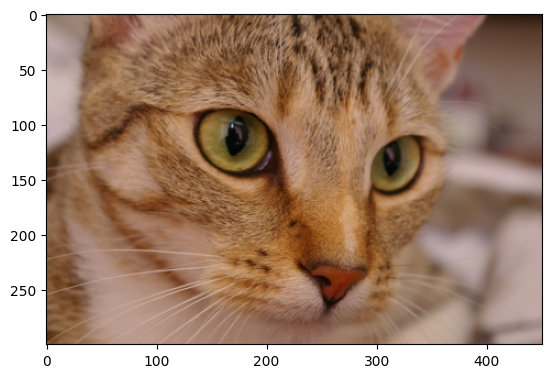

In [ ]:
from skimage.io import imread

image = skimage.data.cat()
plt.imshow(image);

## Resizing images, handling data types and dynamic ranges

While convolutions can handle inputs of any size, it is often useful to resize images to a fixed size. This is particularly important for training deep learning models:

- for **image classification**, most networks expect a specific **fixed input size**;

- for **object detection** and instance segmentation, networks have more flexibility but the image should have **approximately the same size as the training set images**.

Furthermore **large images can be much slower to process** than smaller images (the number of pixels varies quadratically with the height and width).

In [ ]:
from skimage.transform import resize

lowres_image = resize(image, (50, 50), mode='reflect', anti_aliasing=True)
lowres_image.shape

(50, 50, 3)

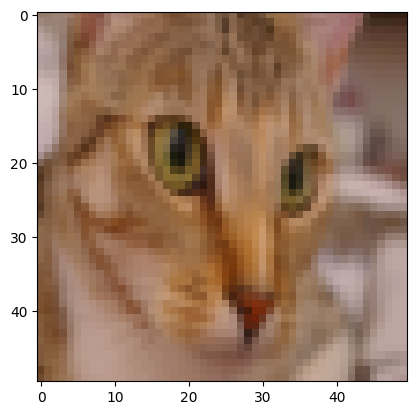

In [ ]:
plt.imshow(lowres_image, interpolation='nearest');

The values of the pixels of the low resolution image are computed from by combining the values of the pixels in the high resolution image. The result is therefore represented as floating points.

## Using a pretrained model

Objectives:

- Load a pre-trained ResNet50 pre-trained model using Keras Zoo
- Use the model to classify an image
- Use the model to classify an image from the webcam

Let's start with loading ResNet50, a well-established method for image classification. The ResNet50 "application" takes two key parameters here: firstly, `include_top` indicates whether we want to include the last layer of the network (the classification layer) or not. Secondly, `weights` indicates whether we want to load the weights of a model that has been pre-trained on ImageNet or not.

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

model = ResNet50(include_top=True, weights='imagenet')
model.compile(optimizer='sgd', loss='categorical_crossentropy')

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
print(model.summary())

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

None


### Classification of an image

**Exercise**
- Reshape the `cat` image to the shape `(224, 224, 3)` using `resize` from `skimage.transform`
- Use `preprocess_input` from `tensorflow.keras.applications.imagenet_utils` to preprocess the image
- Use `predict` to classify the image

Documentation for each method:
- [resize](https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.resize)
- [preprocess_input](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet/preprocess_input)
- [predict](https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict)

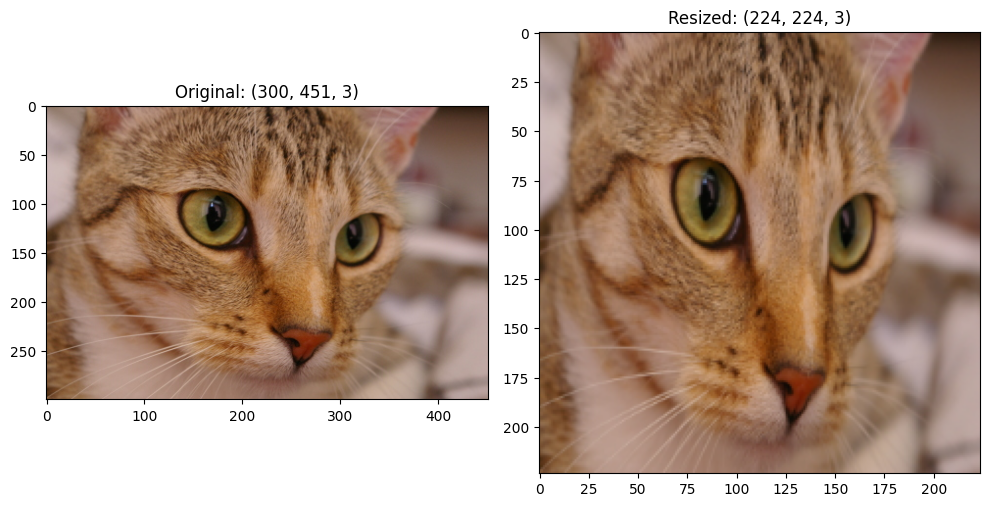

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


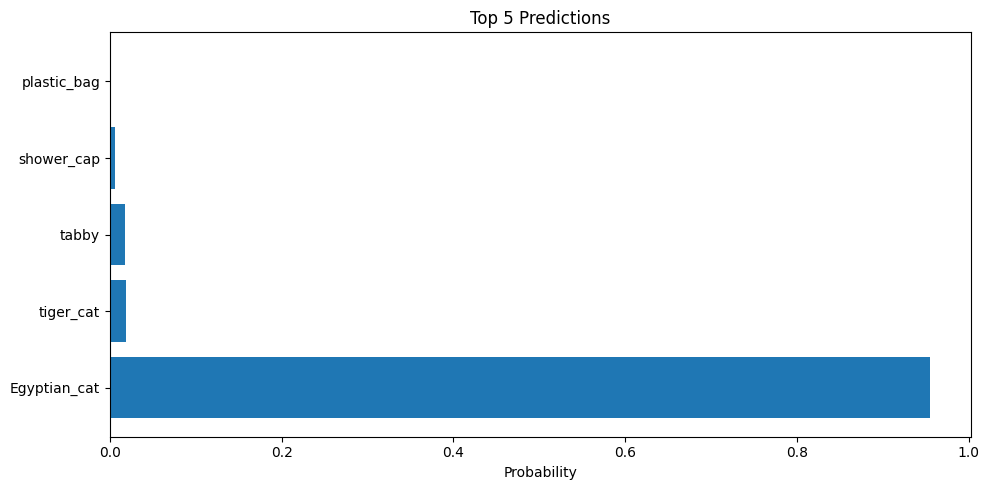

Top predictions:
1: Egyptian_cat (0.9551)
2: tiger_cat (0.0185)
3: tabby (0.0180)
4: shower_cap (0.0055)
5: plastic_bag (0.0011)


In [ ]:
#from keras.applications.resnet50 import preprocess_input, decode_predictions

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Reshape the cat image to (224, 224, 3)
# Using resize from skimage.transform
# Documentation: https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.resize
resized_image = resize(image, (224, 224, 3),
                       anti_aliasing=True,  # Reduces aliasing artifacts
                       preserve_range=True) # Keeps pixel values in original range
resized_image = resized_image.astype('uint8')  # Convert to uint8 for preprocessing

# Display original and resized images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(image)
ax1.set_title(f"Original: {image.shape}")
ax2.imshow(resized_image)
ax2.set_title(f"Resized: {resized_image.shape}")
plt.tight_layout()
plt.show()

# Step 2: Preprocess the image for ResNet50
# Using preprocess_input from tensorflow.keras.applications.resnet50
# Documentation: https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet/preprocess_input
# First, add batch dimension (model expects batches of images)
img_batch = np.expand_dims(resized_image, axis=0)
# Apply preprocessing (handles normalization, RGB->BGR conversion, etc.)
preprocessed_img = preprocess_input(img_batch)

# Step 3: Use the model to classify the image
# Using predict method from the model
# Documentation: https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict
predictions = model.predict(preprocessed_img)

# Step 4: Decode and display the predictions
decoded_predictions = decode_predictions(predictions, top=5)[0]

# Create a visualization of the top predictions
plt.figure(figsize=(10, 5))
plt.barh([pred[1] for pred in decoded_predictions],
         [pred[2] for pred in decoded_predictions])
plt.xlabel("Probability")
plt.title("Top 5 Predictions")
plt.tight_layout()
plt.show()

# Print the predictions in text format
print("Top predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i+1}: {label} ({score:.4f})")

##  Taking snapshots from the webcam

For this section, we will take an image from your laptop webcam and classify it. If you feel uncomfortable doing this section, you can skip it and use a photo of your choice from the web instead.

In [ ]:
import cv2
from skimage.io import imread
from skimage import data

def camera_grab(camera_id=0, fallback_filename=None):
    camera = cv2.VideoCapture(camera_id)
    try:
        # Take 10 consecutive snapshots to allow camera auto-adjustments
        for i in range(10):
            snapshot_ok, image = camera.read()
        if snapshot_ok:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        else:
            print("WARNING: could not access camera")
            if fallback_filename:
                image = imread(fallback_filename)
            else:
                print("Using sample image as fallback")
                # Use a sample image from scikit-image as fallback
                image = data.astronaut()  # Color image of an astronaut
    finally:
        camera.release()
    return image

Using sample image as fallback


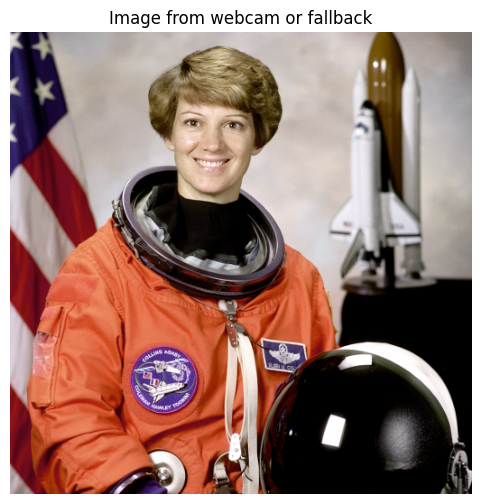

dtype: uint8, shape: (512, 512, 3), range: (0, 255)


In [ ]:
import matplotlib.pyplot as plt

# Capture image from webcam (with automatic fallback to sample image)
image = camera_grab(camera_id=0, fallback_filename=None)

# Display the captured image
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis('off')  # Hide axis for better visualization
plt.title("Image from webcam or fallback")
plt.show()

# Print image details
print("dtype: {}, shape: {}, range: {}".format(
    image.dtype, image.shape, (image.min(), image.max())))

### Exercise

Apply the same preprocessing as before and classify the image. What are your results?

Using sample image as fallback


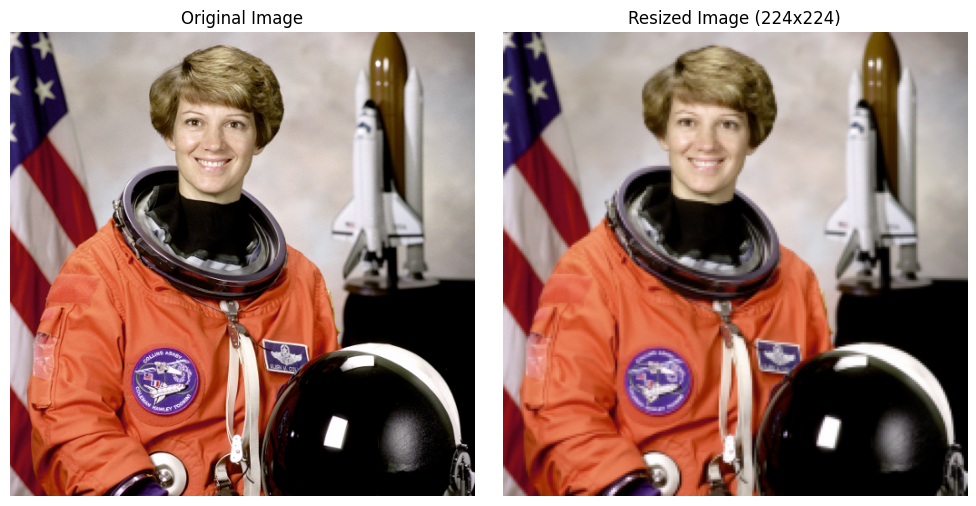

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Top predictions:
1: bobsled (0.28)
2: go-kart (0.15)
3: ski (0.08)
4: space_shuttle (0.06)
5: shield (0.05)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

# 1. Get the image (from webcam or fallback)
image = camera_grab(camera_id=0, fallback_filename=None)

# 2. Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# 3. Resize the image to (224, 224, 3) for ResNet50
resized_image = resize(image, (224, 224, 3), anti_aliasing=True, preserve_range=True)
resized_image = resized_image.astype(np.uint8)  # Ensure correct data type

plt.subplot(1, 2, 2)
plt.imshow(resized_image)
plt.title("Resized Image (224x224)")
plt.axis('off')
plt.tight_layout()
plt.show()

# 4. Preprocess the image for the model
img_batch = np.expand_dims(resized_image, axis=0)
preprocessed_img = preprocess_input(img_batch)

# 5. Load the pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

# 6. Make a prediction
predictions = model.predict(preprocessed_img)

# 7. Decode and display the top 5 predictions
decoded_predictions = decode_predictions(predictions, top=5)[0]
print("Top predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i+1}: {label} ({score:.2f})")

Interesting results! The model's predictions for the astronaut image are quite revealing about how neural networks interpret images:

1. The top prediction was "bobsled" (28% confidence), which is likely due to the shape and appearance of the astronaut's helmet and suit resembling bobsled equipment.

2. "Go-kart" (15%) and "ski" (8%) also suggest the model is focusing on the equipment/gear aspect rather than recognizing this as an astronaut.

ImageNet likely contains more images of bobsleds and go-karts than astronauts, leading to these surprising predictions.

Making a dynamic image picker to test the prediction with other images.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from IPython.display import display
import ipywidgets as widgets
from io import BytesIO
from PIL import Image

def select_and_classify_image():
    """Function to select an image file and classify it with ResNet50"""
    # Create file upload widget
    uploader = widgets.FileUpload(
        accept='.jpg, .jpeg, .png',
        multiple=False,
        description='Upload Image:'
    )
    display(uploader)

    # Button to trigger classification after upload
    button = widgets.Button(description="Classify Image")
    output = widgets.Output()
    display(button, output)

    def on_button_clicked(b):
        with output:
            # Clear previous output
            output.clear_output()

            # Check if file was uploaded
            if not uploader.value:
                print("No file selected. Please upload an image first.")
                return

            # Get the uploaded file data
            file_info = next(iter(uploader.value.items()))
            file_name, file_data = file_info

            # Convert binary data to image
            image_data = BytesIO(file_data['content'])
            image = np.array(Image.open(image_data))

            # Display original image
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(image)
            plt.title("Original Image")
            plt.axis('off')

            # Resize the image to (224, 224, 3) for ResNet50
            resized_image = resize(image, (224, 224, 3), anti_aliasing=True, preserve_range=True)
            resized_image = resized_image.astype(np.uint8)  # Ensure correct data type

            plt.subplot(1, 2, 2)
            plt.imshow(resized_image)
            plt.title("Resized Image (224x224)")
            plt.axis('off')
            plt.tight_layout()
            plt.show()

            # Preprocess the image for the model
            img_batch = np.expand_dims(resized_image, axis=0)
            preprocessed_img = preprocess_input(img_batch)

            # Load the pre-trained ResNet50 model
            model = ResNet50(weights='imagenet')

            # Make a prediction
            print("Classifying image...")
            predictions = model.predict(preprocessed_img)

            # Decode and display the top 5 predictions
            decoded_predictions = decode_predictions(predictions, top=5)[0]
            print("\nTop predictions:")
            for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
                print(f"{i+1}: {label} ({score:.2f})")

    button.on_click(on_button_clicked)

# Run the function
select_and_classify_image()

FileUpload(value={}, accept='.jpg, .jpeg, .png', description='Upload Image:')

Button(description='Classify Image', style=ButtonStyle())

Output()